In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer  # Keras'tan Tokenizer'ı yükleme
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Gerekli kütüphanelerin yüklenmesi
# Tokenizer'ı Keras'tan içe aktardık, böylece metinleri sayısal dizilere dönüştürebiliriz.


In [2]:
# 20 Newsgroups veri setini yükleme
categories = ['rec.sport.baseball', 'rec.sport.hockey', 'sci.med', 'sci.space']  # Sınıflar
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)


# Veri ve etiketlerin ayrılması
texts = newsgroups.data
labels = newsgroups.target

label_names = newsgroups.target_names  # Sınıf isimleri

# İlk 5 örnek metni ve sınıflarını gösterme
for i in range(5):
    print(f"Örnek {i+1} Metin:\n{texts[i][:500]}...")  # Metnin ilk 500 karakterini gösterir
    print(f"Sınıf: {label_names[labels[i]]}")
    print("=" * 100)

# Eğitim ve test verisinin bölünmesi
x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Metin verisinin tokenizasyonu
tokenizer = Tokenizer(num_words=10000)  # En sık kullanılan 10,000 kelimeyi tut
tokenizer.fit_on_texts(x_train)

# Metinlerin sayısal dizilere dönüştürülmesi
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# Verilerin padding işlemi ile sabit uzunlukta yapılması
maxlen = 200  # Metin uzunluğunu sınırlamak için maksimum uzunluk
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

# Etiketlerin one-hot encoding formatına dönüştürülmesi
num_classes = len(categories)  # Toplam sınıf sayısı
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Veri seti:
# - 'fetch_20newsgroups': 20 Newsgroups veri setini indirir.
# - 'texts': Metin verileri, 'labels': Sınıf etiketleri.
# - 'Tokenizer': Metin verilerini sayısal dizilere dönüştürür, en sık kullanılan 10,000 kelimeyi tutar.
# - 'pad_sequences': Tüm metinlerin aynı uzunlukta olmasını sağlamak için padding yapar.
# - 'to_categorical': Sınıf etiketlerini one-hot encoding formatına dönüştürür.


Örnek 1 Metin:
From: nsmca@aurora.alaska.edu
Subject: Re: Eco-Freaks forcing Space Mining.
Article-I.D.: aurora.1993Apr23.123433.1
Organization: University of Alaska Fairbanks
Lines: 43
Nntp-Posting-Host: acad3.alaska.edu

In article <1r96hb$kbi@access.digex.net>, prb@access.digex.com (Pat) writes:
> In article <1993Apr23.001718.1@aurora.alaska.edu> nsmca@aurora.alaska.edu writes:
>>In article <1r6b7v$ec5@access.digex.net>, prb@access.digex.com (Pat) writes:
>>>  Besides this was the same line of horse puckey ...
Sınıf: sci.space
Örnek 2 Metin:
From: boell@hpcc01.corp.hp.com (Donald P Boell)
Subject: Rockies 2-5, two more errors, 6 more walks
Organization: the HP Corporate notes server
Lines: 36


Name            Pos   AB    H    2B    3B    HR    RBI    RS    SB    E    AVG
------------------------------------------------------------------------------
Boston          OF    12    7                        2     6              .583
Galarraga       1B    28   13     3           1      9  

In [3]:
# RNN Modeli
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model_rnn.add(SimpleRNN(128, return_sequences=False))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(num_classes, activation='softmax'))

# Modelin derlenmesi
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# RNN Model Eğitimi
history_rnn = model_rnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
print(model_rnn.summary())

# RNN Modeli:
# - Embedding katmanı: Kelimeleri 128 boyutlu vektörlere dönüştürür.
# - SimpleRNN katmanı: 128 nöronlu bir RNN katmanı.
# - Dropout katmanı: %50 oranında nöronları rastgele devre dışı bırakarak overfitting'i azaltır.
# - Dense çıkış katmanı: Softmax aktivasyon fonksiyonu ile çok sınıflı sınıflandırma yapar.


Epoch 1/10


C:\Users\MKOTAN\anaconda3\envs\env_nlp\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.2545 - loss: 1.4550 - val_accuracy: 0.3270 - val_loss: 1.3570
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3669 - loss: 1.3142 - val_accuracy: 0.3522 - val_loss: 1.2758
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5471 - loss: 1.1025 - val_accuracy: 0.4135 - val_loss: 1.2993
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5301 - loss: 1.1146 - val_accuracy: 0.3836 - val_loss: 1.2508
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5838 - loss: 0.9811 - val_accuracy: 0.4009 - val_loss: 1.2339
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6119 - loss: 0.9142 - val_accuracy: 0.3852 - val_loss: 1.2555
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6250 - loss: 0.8517 - val_accuracy: 0.3931 - val_loss: 1.2387
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6125 - loss: 0.8529 - val_accuracy: 0.4009 - val_loss: 1.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,940,238 (15.03 MB)

 Trainable params: 1,313,412 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,626,826 (10.02 MB)

None


In [4]:
# LSTM Modeli
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model_lstm.add(LSTM(128, return_sequences=False))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(num_classes, activation='softmax'))

# Modelin derlenmesi
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# LSTM Model Eğitimi
history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
print(model_lstm.summary())

# LSTM Modeli:
# - Embedding katmanı: Kelimeleri 128 boyutlu vektörlere dönüştürür.
# - LSTM katmanı: 128 nöronlu bir LSTM katmanı.
# - Dropout katmanı: %50 oranında nöronları rastgele devre dışı bırakarak overfitting'i azaltır.
# - Dense çıkış katmanı: Softmax aktivasyon fonksiyonu ile çok sınıflı sınıflandırma yapar.


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.2733 - loss: 1.3857 - val_accuracy: 0.3931 - val_loss: 1.3711
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.4543 - loss: 1.3177 - val_accuracy: 0.4151 - val_loss: 1.2963
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.5088 - loss: 1.2057 - val_accuracy: 0.5031 - val_loss: 1.1141
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5903 - loss: 1.0329 - val_accuracy: 0.4292 - val_loss: 1.1404
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.5459 - loss: 1.0071 - val_accuracy: 0.5220 - val_loss: 0.9505
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.5721 - loss: 1.0360 - val_accuracy: 0.4984 - val_loss: 1.1045
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6105 - loss: 0.9398 - val_accuracy: 0.6431 - val_loss: 0.8740
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.7131 - loss: 0.7180 - val_accuracy: 0.4701 - v

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,236,302 (16.16 MB)

 Trainable params: 1,412,100 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,824,202 (10.77 MB)

None


In [5]:
# RNN Model Değerlendirmesi
loss_rnn, accuracy_rnn = model_rnn.evaluate(x_test, y_test)
print(f'Test Loss (RNN): {loss_rnn}')
print(f'Test Accuracy (RNN): {accuracy_rnn}')
y_pred_rnn = np.argmax(model_rnn.predict(x_test), axis=1)
y_true_rnn = np.argmax(y_test, axis=1)
# Confusion matrix
cm_rnn = confusion_matrix(y_true_rnn, y_pred_rnn)
print(f'Confusion Matrix (RNN):\n{cm_rnn}')

# precision, recall, F1 score multiclass 
precision_rnn_macro = precision_score(y_true_rnn, y_pred_rnn, average='macro')
recall_rnn_macro = recall_score(y_true_rnn, y_pred_rnn, average='macro')
f1_rnn_macro = f1_score(y_true_rnn, y_pred_rnn, average='macro')

precision_rnn_micro = precision_score(y_true_rnn, y_pred_rnn, average='micro')
recall_rnn_micro = recall_score(y_true_rnn, y_pred_rnn, average='micro')
f1_rnn_micro = f1_score(y_true_rnn, y_pred_rnn, average='micro')


print(f'Macro-Averaged Precision (RNN): {precision_rnn_macro}')
print(f'Macro-Averaged Recall (RNN): {recall_rnn_macro}')
print(f'Macro-Averaged F1 Score (RNN): {f1_rnn_macro}')

print(f'Micro-Averaged Precision (RNN): {precision_rnn_micro}')
print(f'Micro-Averaged Recall (RNN): {recall_rnn_micro}')
print(f'Micro-Averaged F1 Score (RNN): {f1_rnn_micro}')

# LSTM Model Değerlendirmesi
loss_lstm, accuracy_lstm = model_lstm.evaluate(x_test, y_test)
print(f'Test Loss (LSTM): {loss_lstm}')
print(f'Test Accuracy (LSTM): {accuracy_lstm}')

# Predict
y_pred_lstm = model_lstm.predict(x_test)
y_pred_lstm = y_pred_lstm.argmax(axis=1)  # Convert predicted probabilities to class labels
y_test = y_test.argmax(axis=1)  # Convert one-hot encoded true labels to class labels

# Confusion matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
print(f'Confusion Matrix (LSTM):\n{cm_lstm}')

#  precision, recall, F1 score multiclass 
precision_lstm_macro = precision_score(y_test, y_pred_lstm, average='macro')
recall_lstm_macro = recall_score(y_test, y_pred_lstm, average='macro')
f1_lstm_macro = f1_score(y_test, y_pred_lstm, average='macro')

precision_lstm_micro = precision_score(y_test, y_pred_lstm, average='micro')
recall_lstm_micro = recall_score(y_test, y_pred_lstm, average='micro')
f1_lstm_micro = f1_score(y_test, y_pred_lstm, average='micro')


print(f'Macro-Averaged Precision (LSTM): {precision_lstm_macro}')
print(f'Macro-Averaged Recall (LSTM): {recall_lstm_macro}')
print(f'Macro-Averaged F1 Score (LSTM): {f1_lstm_macro}')

print(f'Micro-Averaged Precision (LSTM): {precision_lstm_micro}')
print(f'Micro-Averaged Recall (LSTM): {recall_lstm_micro}')
print(f'Micro-Averaged F1 Score (LSTM): {f1_lstm_micro}')

# Modellerin performansını test verisi üzerinde değerlendirir ve doğruluk ile kayıp metriklerini elde eder.
# Ayrıca tahminler yapılarak karışıklık matrisi oluşturulur.


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3653 - loss: 1.3580
Test Loss (RNN): 1.3723554611206055
Test Accuracy (RNN): 0.369017630815506
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Confusion Matrix (RNN):
[[68 37 35 47]
 [52 70 47 38]
 [44 36 76 48]
 [52 33 32 79]]
Macro-Averaged Precision (RNN): 0.3712958992440125
Macro-Averaged Recall (RNN): 0.3693527147354331
Macro-Averaged F1 Score (RNN): 0.36901148366582237
Micro-Averaged Precision (RNN): 0.3690176322418136
Micro-Averaged Recall (RNN): 0.3690176322418136
Micro-Averaged F1 Score (RNN): 0.3690176322418136
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4840 - loss: 1.0691
Test Loss (LSTM): 1.0784215927124023
Test Accuracy (LSTM): 0.4672544002532959
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Confusion Matrix (LSTM):
[[131  14  28  14]
 [ 89  97  17   4]
 [110   7  69  18]
 [111   2   9  74]]
Macro-Averaged Precision (LSTM): 0.5847720925029287
Macro-Averaged Recall (LSTM): 0.47123002692513105
Macro-Averaged F1 Score (LSTM): 

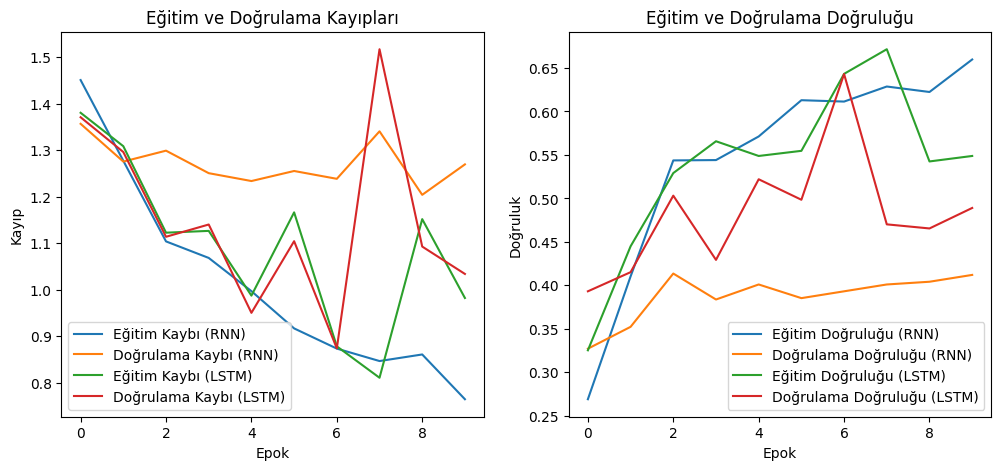

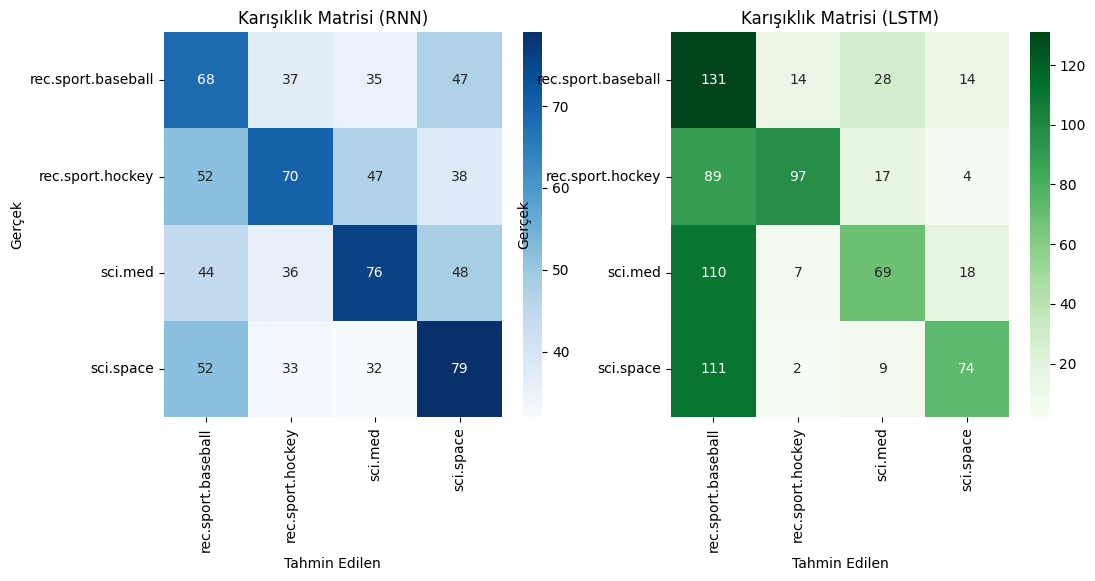

In [6]:
# Eğitim ve Doğrulama Kayıplarının Grafiği
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Eğitim Kaybı (RNN)')
plt.plot(history_rnn.history['val_loss'], label='Doğrulama Kaybı (RNN)')
plt.plot(history_lstm.history['loss'], label='Eğitim Kaybı (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Doğrulama Kaybı (LSTM)')
plt.title('Eğitim ve Doğrulama Kayıpları')
plt.xlabel('Epok')
plt.ylabel('Kayıp')
plt.legend()

# Eğitim ve Doğrulama Doğruluğunun Grafiği
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Eğitim Doğruluğu (RNN)')
plt.plot(history_rnn.history['val_accuracy'], label='Doğrulama Doğruluğu (RNN)')
plt.plot(history_lstm.history['accuracy'], label='Eğitim Doğruluğu (LSTM)')
plt.plot(history_lstm.history['val_accuracy'], label='Doğrulama Doğruluğu (LSTM)')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epok')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Karışıklık Matrisi Görselleştirme
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi (RNN)')

plt.subplot(1, 2, 2)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens', xticklabels=categories, yticklabels=categories)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi (LSTM)')
plt.show()

# Modellerin eğitim ve doğrulama kayıplarını ve doğruluklarını karşılaştırmak için grafikler oluşturur.
# Karışıklık matrisleri ve doğruluk karşılaştırma grafiği ile performansı görselleştirir.


In [ ]:
import pandas as pd

# Veri setini yükleme
data = pd.read_csv('path/to/your/dataset.csv')

# Metin ve etiket sütunlarını ayırma
texts = data['text_column_name'].values
labels = data['label_column_name'].values
